In [1]:
from dotenv import load_dotenv
load_dotenv()
import scllm as sl
import scanpy as sc
from langchain_openai import ChatOpenAI

# Annotate cell types

In [2]:
pbmc = sc.datasets.pbmc3k_processed()

In [3]:
openai_model = "gpt-4o-mini"
llm = ChatOpenAI(temperature=0.0, model=openai_model)

In [4]:
pbmc

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [5]:
sc.tl.leiden(pbmc, flavor="igraph", n_iterations=2)

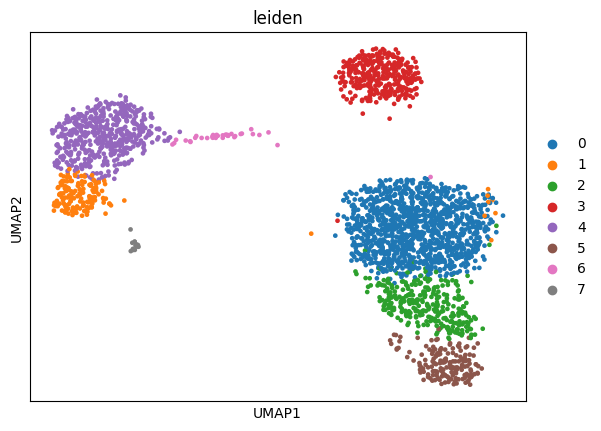

In [6]:
sc.pl.umap(pbmc, color='leiden')

In [7]:
sl.annotate_cluster(llm, pbmc, cluster_key='leiden', use_raw=True)

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'leiden', 'leiden_annotated'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'leiden', 'leiden_colors', 'leiden_rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

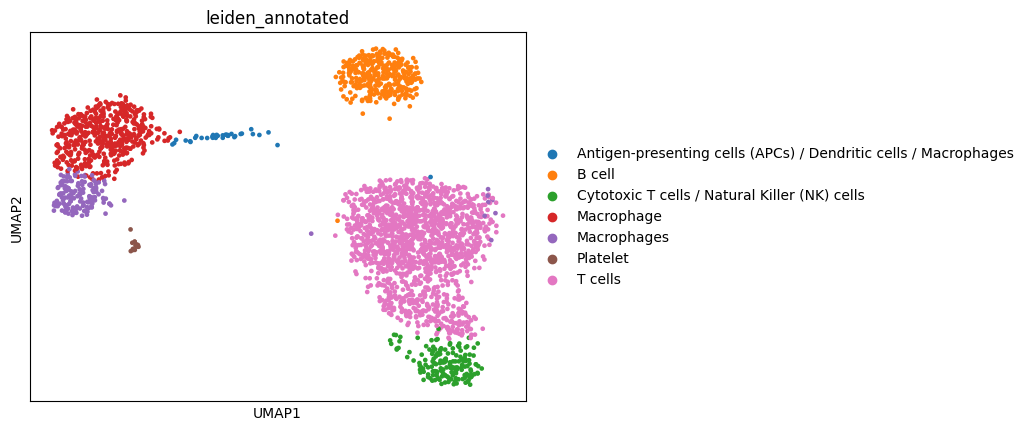

In [11]:
sc.pl.umap(pbmc, color='leiden_annotated')